In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer, HfArgumentParser, AutoConfig, AutoModelForSequenceClassification
from datasets import load_dataset
from trl import ModelConfig, RewardConfig, RewardTrainer, get_kbit_device_map, get_peft_config, get_quantization_config
import torch
import os

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device_map = {"": int(os.environ.get("LOCAL_RANK") or 0)}
# model = AutoModelForCausalLM.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2", device_map=device_map)
tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.2")
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})
    # model.resize_token_embeddings(len(tokenizer))
tokenizer.model_max_length = 256 #NOTE: might wanna change this
# model.config.pad_token_id = model.config.eos_token_id
# model.to(device)
print("Model on device:", device)

Model on device: cuda


In [13]:
# from datasets import DatasetDict

name = "Tachi67/rm_data_action"

dataset = load_dataset(name)

dataset

Generating test split: 100%|██████████| 2243/2243 [00:00<00:00, 560590.15 examples/s]


DatasetDict({
    train: Dataset({
        features: ['chosen', 'rejected'],
        num_rows: 42606
    })
    test: Dataset({
        features: ['chosen', 'rejected'],
        num_rows: 2243
    })
})

Max length:  150
Min length:  34
Mean length:  62.18897573111769
Median length:  59


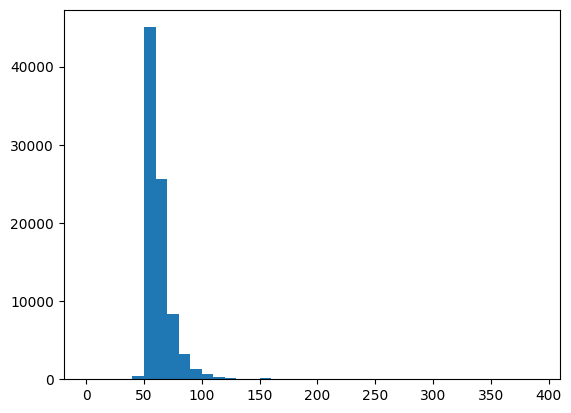

In [20]:
tokenizer.model_max_length = 150 #NOTE: might wanna change this

# see max token length in the data
lengths = []
for i in range(len(dataset['train'])):
    # max_len = max(max_len, len(tokenizer.encode(dataset['train'][i]['text'])))
    lengths.append(len(tokenizer(dataset['train'][i]['chosen'], truncation=True)['input_ids']))
    lengths.append(len(tokenizer(dataset['train'][i]['rejected'], truncation=True)['input_ids']))

# print statistics
print("Max length: ", max(lengths))
print("Min length: ", min(lengths))
print("Mean length: ", sum(lengths)/len(lengths))
print("Median length: ", sorted(lengths)[len(lengths)//2])

# plot distribution
import matplotlib.pyplot as plt
plt.hist(lengths, bins=range(0, 400, 10))
plt.show()


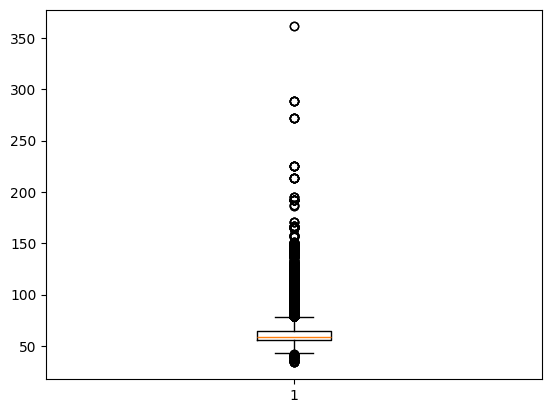

In [17]:

# plot boxplot
plt.boxplot(lengths)
plt.show()